Importing the dependencies


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset to a pandas dataframe
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [3]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
#last 5 rows
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,...,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,...,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,...,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,...,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0
45645,42437,-0.652459,0.177290,1.955607,-1.879724,-0.368457,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [6]:
#checking the no.of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [7]:
#distribution of legit transaction & fraudulent transaction
credit_card_data['Class'].value_counts()

,count
Class,
0.0,45503
1.0,142


This dataset is highly unbalanced


0-->Normal Transaction

1-->Fraudulent Transaction


In [8]:
#seperating the data for analysis

legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]
print(legit.shape)
print(fraud.shape)

(45503, 31)
(142, 31)


In [9]:
# statistical measures of the data

legit.Amount.describe()

,Amount
count,45503.000000
mean,90.808470
std,240.322652
min,0.000000
25%,7.580000
50%,24.990000
75%,82.360000
max,7879.420000


In [10]:
fraud.Amount.describe()

,Amount
count,142.000000
mean,97.592183
std,233.185192
min,0.000000
25%,1.000000
50%,8.370000
75%,99.990000
max,1809.680000


In [11]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,27549.332857,-0.21371,0.011525,0.732168,0.173212,-0.230885,0.106122,-0.092498,0.041321,0.169777,...,0.046284,-0.029987,-0.108242,-0.038246,0.009637,0.136319,0.021863,0.003681,0.004547,90.808470
1.0,26193.556338,-7.87188,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of Fraudulent Transactions -->492


In [12]:
legit_sample=legit.sample(n=492)

Concatenating 2 Dataframes

In [13]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [14]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42326,41055,1.062392,-1.124741,1.169462,-0.477367,-1.723225,-0.245904,-1.023485,0.076902,-0.503939,...,0.321988,0.696852,-0.117604,0.588925,0.255359,-0.233049,0.028116,0.042811,131.90,0.0
14462,25627,1.073812,-0.317008,2.001716,2.961909,-1.258435,1.249026,-1.341812,0.566324,1.405817,...,0.013737,0.448845,-0.167215,-0.122665,0.494449,0.287599,0.083580,0.032091,8.06,0.0
11861,20389,1.048919,-0.047160,0.505764,0.857389,-0.405459,-0.470953,-0.066600,-0.107679,1.483286,...,-0.339526,-0.953202,0.113428,-0.017943,0.051567,0.079935,-0.063200,0.022186,89.99,0.0
24540,33276,1.063940,0.004605,0.239062,1.235083,0.017402,0.344634,0.004400,0.150021,0.069708,...,-0.047910,-0.037862,-0.150285,-0.289068,0.656889,-0.313906,0.026807,0.009532,50.30,0.0
16709,28071,1.144751,0.044468,1.273891,2.808773,-0.668934,0.644241,-0.678497,0.286560,0.634228,...,-0.021660,0.254884,-0.180896,-0.096868,0.651567,0.247412,0.041835,0.020055,1.52,0.0


In [15]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44091,41791,-7.222731,6.155773,-10.826460,4.180779,-6.123555,-3.114136,-6.895112,5.161516,-2.516477,...,0.912700,-0.630358,0.190887,-0.061263,0.379775,-0.266845,1.193695,0.257468,99.99,1.0
44223,41851,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,1.0
44270,41870,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00,1.0
44556,41991,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,...,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1.00,1.0
45203,42247,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,1.0


In [16]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,142


In [17]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,26719.060976,-0.361995,-0.088292,0.671211,0.117178,-0.201667,0.051063,-0.096444,-0.031793,0.188418,...,0.066717,-0.024427,-0.177520,-0.001738,-0.019561,0.111233,0.059322,-0.004351,0.001969,106.441829
1.0,26193.556338,-7.871880,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


Splitting the data into features and target

In [18]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [19]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42326,41055,1.062392,-1.124741,1.169462,-0.477367,-1.723225,-0.245904,-1.023485,0.076902,-0.503939,...,0.368238,0.321988,0.696852,-0.117604,0.588925,0.255359,-0.233049,0.028116,0.042811,131.90
14462,25627,1.073812,-0.317008,2.001716,2.961909,-1.258435,1.249026,-1.341812,0.566324,1.405817,...,-0.242521,0.013737,0.448845,-0.167215,-0.122665,0.494449,0.287599,0.083580,0.032091,8.06
11861,20389,1.048919,-0.047160,0.505764,0.857389,-0.405459,-0.470953,-0.066600,-0.107679,1.483286,...,-0.059575,-0.339526,-0.953202,0.113428,-0.017943,0.051567,0.079935,-0.063200,0.022186,89.99
24540,33276,1.063940,0.004605,0.239062,1.235083,0.017402,0.344634,0.004400,0.150021,0.069708,...,-0.092031,-0.047910,-0.037862,-0.150285,-0.289068,0.656889,-0.313906,0.026807,0.009532,50.30
16709,28071,1.144751,0.044468,1.273891,2.808773,-0.668934,0.644241,-0.678497,0.286560,0.634228,...,-0.229123,-0.021660,0.254884,-0.180896,-0.096868,0.651567,0.247412,0.041835,0.020055,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,41791,-7.222731,6.155773,-10.826460,4.180779,-6.123555,-3.114136,-6.895112,5.161516,-2.516477,...,0.818859,0.912700,-0.630358,0.190887,-0.061263,0.379775,-0.266845,1.193695,0.257468,99.99
44223,41851,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,0.427203,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90
44270,41870,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,0.396655,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00
44556,41991,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,...,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1.00


In [20]:
Y

,Class
42326,0.0
14462,0.0
11861,0.0
24540,0.0
16709,0.0
...,...
44091,1.0
44223,1.0
44270,1.0
44556,1.0


To split the data into training data and testing data

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(634, 30) (507, 30) (127, 30)


In [23]:
print(X.shape,X_train.shape,X_test.shape)

(634, 30) (507, 30) (127, 30)


Model Training

Logistic Regression

In [24]:
model=LogisticRegression()

In [25]:
# training the Logistic Regression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation


Accuracy Score



In [26]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.9783037475345168


In [28]:
# accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print("Accuracy on testing data:",test_data_accuracy)

Accuracy on testing data: 0.968503937007874


**Distribution of Transaction Amount by Class (Undersampled Data)**


Let's visualize the Amount feature for both legitimate and fraudulent transactions in our balanced new_dataset.

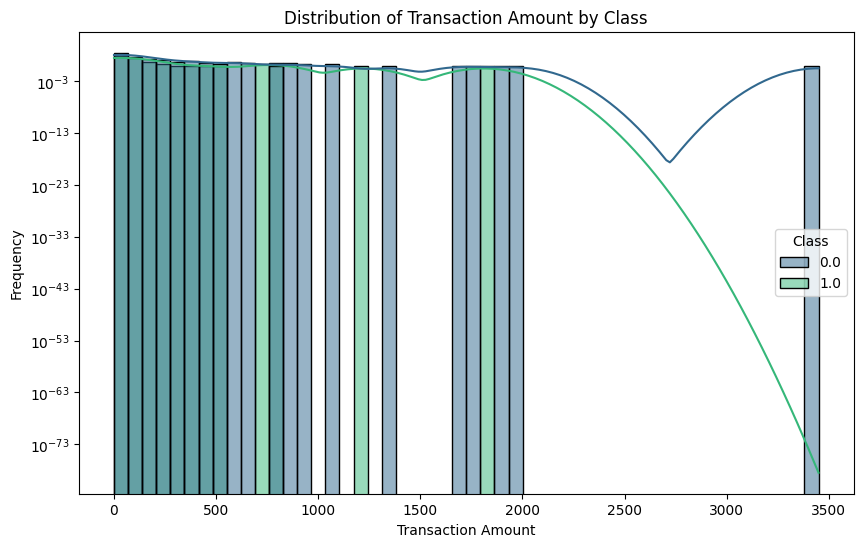

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for 'Amount' feature, separated by 'Class'
plt.figure(figsize=(10, 6))
sns.histplot(data=new_dataset, x='Amount', hue='Class', kde=True, bins=50, palette='viridis')
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

The histogram shows the frequency of different transaction amounts for both classes. A log scale on the y-axis helps to see details in lower frequency bins. It appears that fraudulent transactions often involve smaller amounts, though there's an overlap. Let's also look at a box plot for a clearer view of the statistical spread.

/tmp/ipython-input-508197447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_dataset, x='Class', y='Amount', palette='viridis')


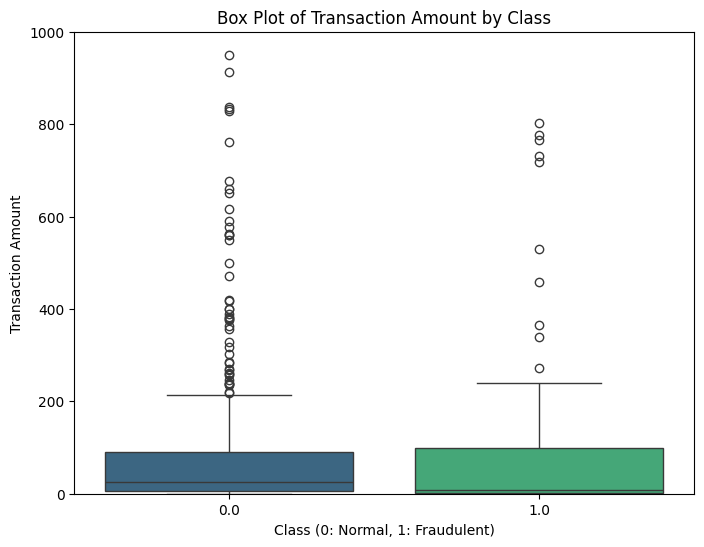

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_dataset, x='Class', y='Amount', palette='viridis')
plt.title('Box Plot of Transaction Amount by Class')
plt.xlabel('Class (0: Normal, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.ylim(0, 1000)
plt.show()

The box plot provides a summary of the distribution, showing the median, quartiles, and potential outliers. By limiting the y-axis, we can better observe the differences in the bulk of the transaction amounts for both normal and fraudulent activities. It reinforces the observation that fraudulent transactions tend to have lower amounts on average, but both classes have a wide range and some high-value outliers.

In [32]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data: {training_data_accuracy:.4f}")

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data: {test_data_accuracy:.4f}")

Accuracy on training data: 0.9783
Accuracy on testing data: 0.9685
